In [3]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install xgboost
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score



In [4]:
#Import data

df = pd.read_csv('creditcard.csv')
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
#Time column is not required for our predictive model, so dropped
df.drop('Time', axis=1, inplace=True) 
df = df.dropna()
df = df.reset_index(drop=True)

In [7]:
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [8]:
len(df)

284807

In [9]:
trans = len(df) #save the number of transactions
nonfraud_count = len(df[df.Class==0])
fraud_count = len(df[df.Class==1])
fraud_per = round(fraud_count/nonfraud_count*100,2)

print(f"Number of transactions in data: {trans}")
print(f"Number of nonfraud: {nonfraud_count}")
print(f"Number of fraud: {fraud_count}")
print(f"fraud percentage: {fraud_per}")

Number of transactions in data: 284807
Number of nonfraud: 284315
Number of fraud: 492
fraud percentage: 0.17


In [10]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


**DATA Visuallisation

In [11]:
#Applying the standard scaler to data
scale = StandardScaler()
value_amount = df['Amount'].values

df['Amount'] = scale.fit_transform(value_amount.reshape(-1,1))
df['Amount'].head()

0    0.244964
1   -0.342475
2    1.160686
3    0.140534
4   -0.073403
Name: Amount, dtype: float64

In [12]:
#Data split

x = df.drop('Class', axis=1)
y = df['Class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

print(f"x_train: {x_train[:1]}, x_train: {x_train[:1]}")

x_train:              V1        V2        V3        V4        V5        V6        V7  \
68806 -1.115047  1.035583  0.800712 -1.060398  0.032621  0.853422 -0.614243   

             V8        V9       V10  ...       V20       V21       V22  \
68806 -3.231161  1.539948 -0.816909  ... -0.644896  3.020385 -0.539618   

            V23       V24       V25       V26       V27       V28    Amount  
68806  0.033156 -0.774946  0.105868 -0.430853  0.229737 -0.070591 -0.301454  

[1 rows x 29 columns], x_train:              V1        V2        V3        V4        V5        V6        V7  \
68806 -1.115047  1.035583  0.800712 -1.060398  0.032621  0.853422 -0.614243   

             V8        V9       V10  ...       V20       V21       V22  \
68806 -3.231161  1.539948 -0.816909  ... -0.644896  3.020385 -0.539618   

            V23       V24       V25       V26       V27       V28    Amount  
68806  0.033156 -0.774946  0.105868 -0.430853  0.229737 -0.070591 -0.301454  

[1 rows x 29 columns]


In [13]:
x_train

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
68806,-1.115047,1.035583,0.800712,-1.060398,0.032621,0.853422,-0.614243,-3.231161,1.539948,-0.816909,...,-0.644896,3.020385,-0.539618,0.033156,-0.774946,0.105868,-0.430853,0.229737,-0.070591,-0.301454
40018,1.228473,-0.138826,0.473795,-0.166381,-0.453564,-0.190135,-0.355309,0.048598,0.128943,-0.014495,...,0.032481,-0.172147,-0.574730,0.036834,-0.303782,0.073315,0.810356,-0.069178,0.001890,-0.250998
250360,1.926148,-0.198628,-0.286727,1.596852,-0.488963,-0.311405,-0.303207,0.035513,1.301312,0.007083,...,-0.355216,-0.528432,-1.251300,0.455607,-0.120530,-0.361515,-1.099295,0.052747,-0.032622,-0.325643
234820,2.046232,0.196183,-1.704650,0.530027,0.177496,-1.443091,0.255403,-0.365759,0.602945,-0.478188,...,-0.216247,0.201104,0.757245,-0.013600,-0.079318,0.234805,-0.098151,0.000028,-0.031675,-0.335038
10001,-0.837077,1.034710,2.333129,3.103776,0.229143,0.501123,0.314283,-0.161583,0.409634,0.889521,...,-0.134542,-0.363839,-0.458101,0.164097,0.234167,-0.418734,-0.074078,-0.355165,-0.169616,-0.338077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211543,-1.321976,1.138686,-0.940861,0.154160,0.109802,-0.538822,0.490058,0.513762,-0.493834,-0.446486,...,-0.436962,-0.012778,-0.237503,0.008713,-0.767844,-0.397162,0.316379,-0.463125,-0.010589,-0.153765
86293,-0.627810,0.918729,1.478453,0.213171,0.933695,1.261486,0.504752,0.404286,-0.939740,-0.853181,...,0.088281,-0.051356,-0.004245,0.090535,-0.964599,-0.522294,0.296733,0.145939,0.110400,-0.253317
122579,1.512602,-0.949435,-0.219062,-1.638850,-0.856348,-0.465996,-0.669193,-0.135566,-2.284345,1.611424,...,-0.279028,-0.558803,-1.377240,0.080444,-0.579511,0.297851,-0.495367,-0.001415,0.003665,-0.213696
152315,1.798863,-1.699791,-0.142182,-0.619533,-1.570248,0.083268,-1.501980,0.176287,1.755507,0.470972,...,0.146098,0.181914,0.351358,0.115638,-0.566188,-0.596200,-0.295152,-0.033616,-0.032471,0.331683


In [ ]:
#Exploratory Data analysis

In [ ]:
for col in x_train.columns.values:
    plt.hist(x_train[col])
    plt.xlabel(col)
    plt.show()

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(x_train, alpha=0.2, figsize=(29,29), diagonal='kde')

In [ ]:
corrMatrix = x_train.corr(method= 'spearman')
fig, ax = plt.subplots(figsize=(20,16))
sns.heatmap(abs(corrMatrix), annot=False)
plt.show()

In [14]:
# Implementation of different models

# 1. Decision Tree

tree_model = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')
tree_model.fit(x_train, y_train)
tree_yhat = tree_model.predict(x_test)

In [16]:
tree_accu = accuracy_score(y_test, tree_yhat)
print('Accuracy score of the Decision Tree model is {}'.format(tree_accu))

print('F1 score of the Decision Tree model is {}'.format(f1_score(y_test, tree_yhat)))

Accuracy score of the Decision Tree model is 0.9993679997191109
F1 score of the Decision Tree model is 0.8105263157894738


In [17]:
# 2. K-Nearest Neighbors

n = 5

knn = KNeighborsClassifier(n_neighbors = n)
knn.fit(x_train, y_train)
knn_yhat = knn.predict(x_test)

In [18]:
knn_accu = accuracy_score(y_test, knn_yhat)
print('Accuracy score of the KNN model is {}'.format(knn_accu))

print('F1 score of the KNN model is {}'.format(f1_score(y_test, knn_yhat)))

Accuracy score of the KNN model is 0.9995259997893332
F1 score of the KNN model is 0.8571428571428572


In [19]:
# 3. Logistic Regression

lr = LogisticRegression()
lr.fit(x_train, y_train)
lr_yhat = lr.predict(x_test)

In [20]:
lr_accu = accuracy_score(y_test, lr_yhat)
print('Accuracy score of the Logistic Regression model is {}'.format(lr_accu))

print('F1 score of the Logistic Regression model is {}'.format(f1_score(y_test, lr_yhat)))

Accuracy score of the Logistic Regression model is 0.9991924440855307
F1 score of the Logistic Regression model is 0.7356321839080459


In [21]:
# 4. SVM 

svm = SVC()
svm.fit(x_train, y_train)
svm_yhat = svm.predict(x_test)

In [22]:
svm_accu = accuracy_score(y_test, svm_yhat)
print('Accuracy score of the SVM model is {}'.format(svm_accu))

print('F1 score of the SVM model is {}'.format(f1_score(y_test, svm_yhat)))

Accuracy score of the SVM model is 0.9993153330290369
F1 score of the SVM model is 0.7771428571428572


In [23]:
# 5. Random Forest Tree

rf = RandomForestClassifier(max_depth = 4)
rf.fit(x_train, y_train)
rf_yhat = rf.predict(x_test)

In [24]:
rf_accu = accuracy_score(y_test, rf_yhat)
print('Accuracy score of the Random Forest Tree model is {}'.format(rf_accu))

print('F1 score of the Random Forest Tree model is {}'.format(f1_score(y_test, rf_yhat)))

Accuracy score of the Random Forest Tree model is 0.9992977774656788
F1 score of the Random Forest Tree model is 0.7727272727272727


In [25]:

# 6. XGBoost

xgb = XGBClassifier(max_depth = 4)
xgb.fit(x_train, y_train)
xgb_yhat = xgb.predict(x_test)

C:\Users\Kaustubh Patil\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:47:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [26]:
xgb_accu = accuracy_score(y_test, xgb_yhat)
print('Accuracy score of the XGBoost model is {}'.format(xgb_accu))

print('F1 score of the XGBoost model is {}'.format(f1_score(y_test, xgb_yhat)))


Accuracy score of the XGBoost model is 0.9994908886626171
F1 score of the XGBoost model is 0.8449197860962566


<function matplotlib.pyplot.show(close=None, block=None)>

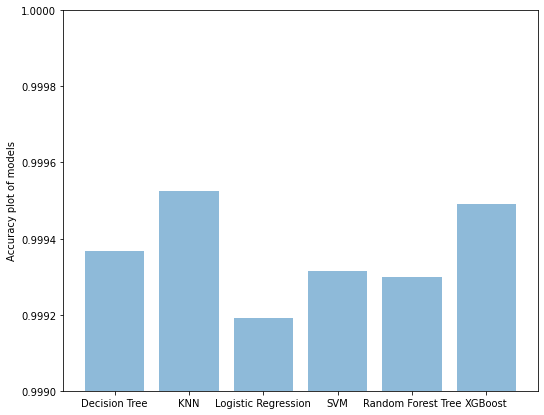

In [53]:
plt.figure(1, figsize = (8.5,7))
mod = ['Decision Tree', 'KNN', 'Logistic Regression','SVM','Random Forest Tree','XGBoost']
y_ax = np.arange(len(mod))
accu = [tree_accu, knn_accu,lr_accu, svm_accu, rf_accu, xgb_accu]
plt.bar(y_ax,accu,align='center', alpha=0.5)
plt.ylim((0.999,1))
plt.xticks(y_ax, mod)
plt.ylabel('Accuracy plot of models')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

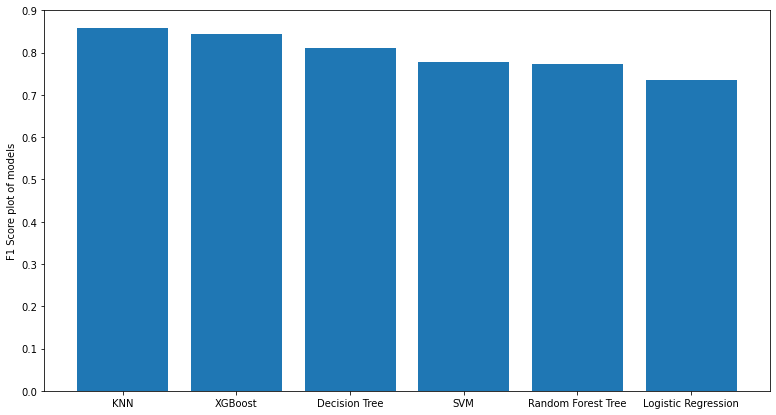

In [64]:
plt.figure(2, figsize = (13,7))
mod = ['Decision Tree', 'KNN', 'Logistic Regression','SVM','Random Forest Tree','XGBoost']
y_ax = np.arange(len(mod))
f1 = [f1_score(y_test, tree_yhat),f1_score(y_test, knn_yhat), f1_score(y_test, lr_yhat), f1_score(y_test, svm_yhat), f1_score(y_test, rf_yhat), f1_score(y_test, xgb_yhat)]
gr = pd.DataFrame({'Models': mod, 'F1_Score': f1})
gr_sorted = gr.sort_values('F1_Score', ascending=False)

plt.bar('Models','F1_Score', data=gr_sorted)
plt.ylabel('F1 Score plot of models')
plt.show

In [67]:
# Compute confusion matrix for the models

tree_matrix = confusion_matrix(y_test, tree_yhat, labels = [0, 1]) # Decision Tree
print(f"Confusion matrix for Decision tree: \n{tree_matrix}")

Confusion matrix for Decision tree: 
[[56849    12]
 [   24    77]]


In [42]:
knn_matrix = confusion_matrix(y_test, knn_yhat, labels = [0, 1]) # K-Nearest Neighbors
print(f"Confusion matrix for Decision tree: \n{knn_matrix}")

Confusion matrix for Decision tree: 
[[56854     7]
 [   20    81]]


In [43]:
lr_matrix = confusion_matrix(y_test, lr_yhat, labels = [0, 1]) # Logistic Regression
print(f"Confusion matrix for Logistic Regression: \n{lr_matrix }")

Confusion matrix for Logistic Regression: 
[[56852     9]
 [   37    64]]


In [44]:
svm_matrix = confusion_matrix(y_test, svm_yhat, labels = [0, 1]) # Support Vector Machine
print(f"Confusion matrix for Support Vector Machine: \n{svm_matrix}")

Confusion matrix for Support Vector Machine: 
[[56855     6]
 [   33    68]]


In [45]:
rf_matrix = confusion_matrix(y_test, rf_yhat, labels = [0, 1]) # Random Forest Tree
print(f"Confusion matrix for Random Forest Tree: \n{rf_matrix}")

Confusion matrix for Random Forest Tree: 
[[56854     7]
 [   33    68]]


In [46]:
xgb_matrix = confusion_matrix(y_test, xgb_yhat, labels = [0, 1]) # XGBoost
print(f"Confusion matrix for XGBoost: \n{xgb_matrix}")

Confusion matrix for XGBoost: 
[[56854     7]
 [   22    79]]
